## IMPORT LIBRARIES

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus as pydot
from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [59]:
feature = pd.read_csv('classification_feat.csv')
predictor = pd.read_csv('classification_pred.csv', header = 0)
feature['Quarter end'] = pd.to_datetime(feature['Quarter end'])
feature.set_index("Quarter end", inplace=True)
predictor = predictor.drop(columns = 'Unnamed: 0')

## Feature Importance

In [94]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'green') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [11]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center', color = 'green')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

## Confusion Matrix Function Plot

In [12]:
labels = ['Growth', 'Value']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    
    # Compute confusion matrix
#     cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
#     print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## Decision Tree Classification 

In [105]:
ctree = DecisionTreeClassifier(max_depth = 2)

In [106]:
# Feautures and Predicted
y = predictor

X  = feature

In [107]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
no_symbol = X_train.drop(columns = 'symbol')

## Cross Validation

In [110]:
ctree_cv_score = cross_val_score(ctree, no_symbol, y_train, cv=3)
mean_ctree_cv_score = np.mean(ctree_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_ctree_cv_score * 100))

# Mean Cross Validation Score: 74.55%

Mean Cross Validation Score: 74.55%


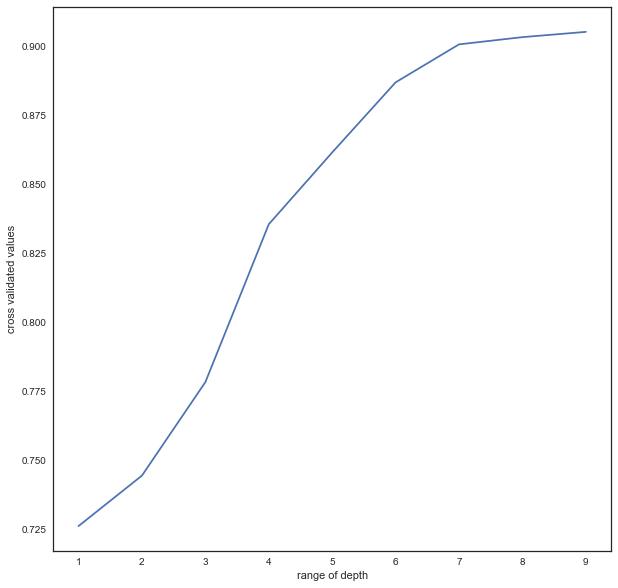

In [113]:
score = cross_val_score(ctree, no_symbol, y_train, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, no_symbol, y_train, cv = 10)
    val.append(depth_score.mean())
# print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

## Model Testing

In [114]:
ctree.fit(no_symbol,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
no_symtest = X_test.drop(columns='symbol')

In [117]:
# predict the response for new observations
test_preds = ctree.predict(no_symtest)

In [166]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)*100

# 90.2890864271308

90.20691715843729

In [119]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')


# Accuracy Score: 0.9028908642713079
# Precision Score: 0.8897593732512591
# Recall Score: 0.8705968242379997
# F1 Score: 0.8800738007380075

#               precision    recall  f1-score   support

#            0       0.91      0.93      0.92      7908
#            1       0.89      0.87      0.88      5479

#     accuracy                           0.90     13387
#    macro avg       0.90      0.90      0.90     13387
# weighted avg       0.90      0.90      0.90     13387

Accuracy Score: 0.9020691715843729
Precision Score: 0.8890963405526512
Recall Score: 0.8691367037780617
F1 Score: 0.8790032302722658

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7908
           1       0.89      0.87      0.88      5479

    accuracy                           0.90     13387
   macro avg       0.90      0.90      0.90     13387
weighted avg       0.90      0.90      0.90     13387



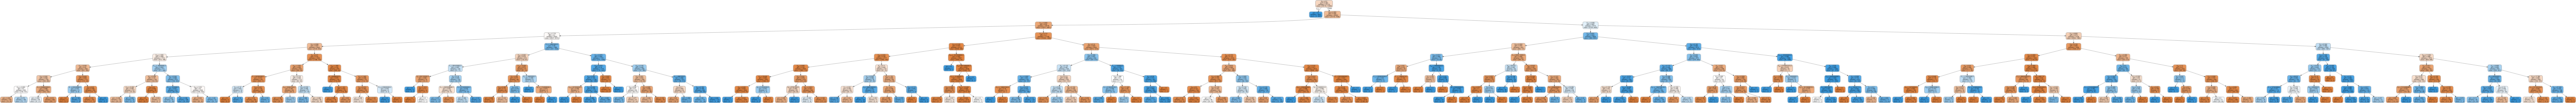

In [120]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

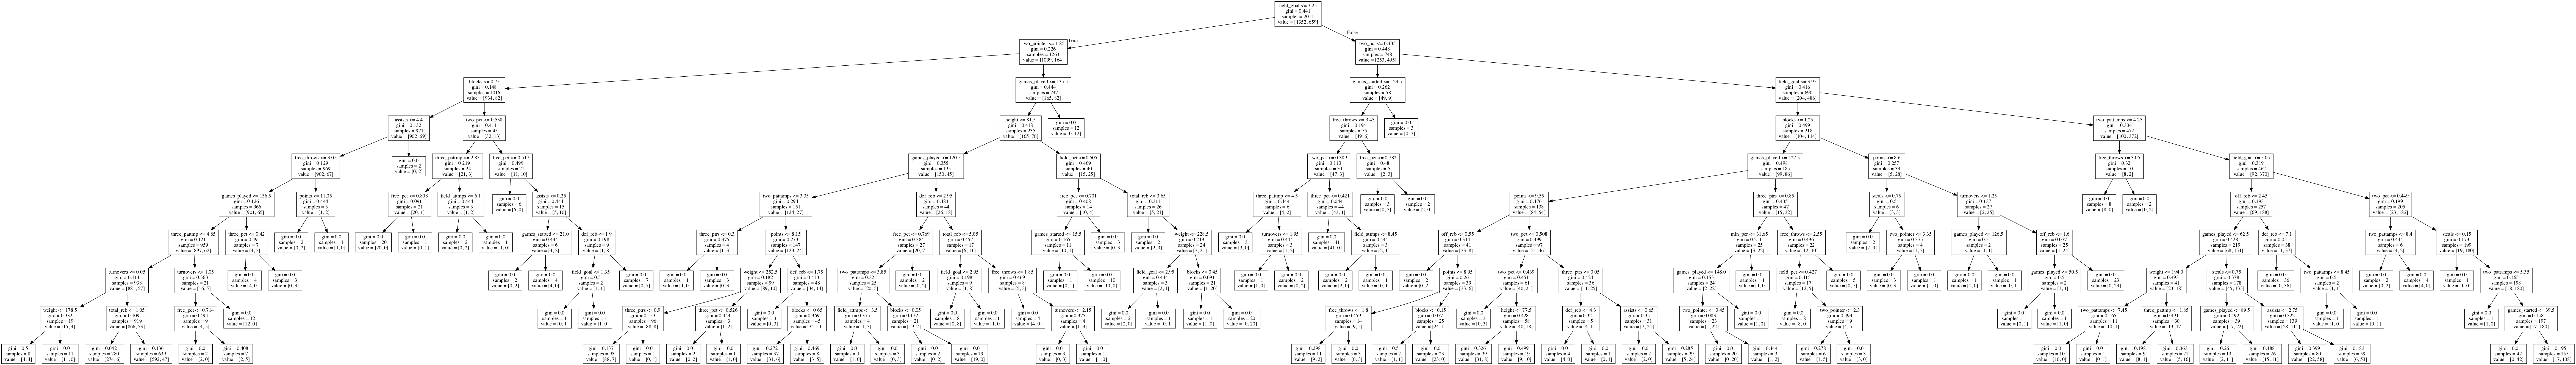

In [120]:
dot_data = StringIO()  
tree.export_graphviz(ctree, out_file=dot_data, feature_names= X.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

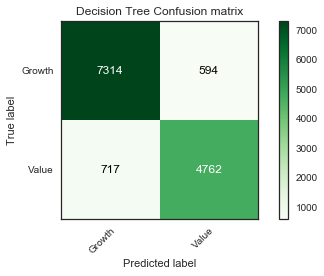

In [121]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Decision Tree Confusion matrix')

plt.show()

# print(confusion_matrix(y_test, test_preds, labels=None, sample_weight=None))

##  Standard Scalar For Decision Tree

In [30]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [31]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')


# Accuracy Score: 0.8613580339134982
# Precision Score: 0.8893187191059532
# Recall Score: 0.755247307902902
# F1 Score: 0.8168180023687328

#               precision    recall  f1-score   support

#            0       0.85      0.93      0.89      7908
#            1       0.89      0.76      0.82      5479

#     accuracy                           0.86     13387
#    macro avg       0.87      0.85      0.85     13387
# weighted avg       0.86      0.86      0.86     13387

Accuracy Score: 0.8613580339134982
Precision Score: 0.8893187191059532
Recall Score: 0.755247307902902
F1 Score: 0.8168180023687328

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7908
           1       0.89      0.76      0.82      5479

    accuracy                           0.86     13387
   macro avg       0.87      0.85      0.85     13387
weighted avg       0.86      0.86      0.86     13387



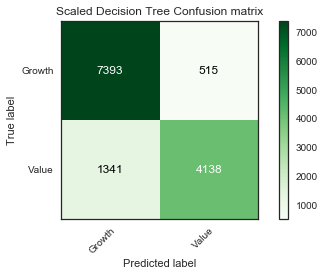

In [32]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Decision Tree Confusion matrix')

plt.show()

## Grid Search Decision Tree

In [37]:
dt_grid_param = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 3, 4, 5, 6],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(ctree, dt_grid_param, verbose=1, cv=3, n_jobs=-1)

dt_gs_results = dt_grid_search.fit(no_symbol, y_train)


# Fitting 3 folds for each of 216 candidates, totalling 648 fits

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  8.8min finished


In [168]:
# knn_gs_training_score = np.mean(knn_grid_search.cv_results_['mean_train_score'])
# knn_gs_testing_score =  knn_grid_search.score(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = dt_grid_search.predict(no_symtest)

# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(dt_grid_search.best_params_)
print("\nBest Estimator Found:")
print(dt_grid_search.best_estimator_)
print("Besti Score Found:")
print(dt_grid_search.best_score_)

# Accuracy Score : 0.8943751400612534
# Precision Score : 0.8805467140984834
# Recall Score : 0.8583683153860193
# F1 Score : 0.8693160813308687
# Best Parameter Found:
# {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5}

# Best Estimator Found:
# DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#                        max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=6, min_samples_split=5,
#                        min_weight_fraction_leaf=0.0, presort=False,
#                        random_state=None, splitter='best')
# Besti Score Found:
# 0.9009529416093307

Accuracy Score : 0.8943751400612534
Precision Score : 0.8805467140984834
Recall Score : 0.8583683153860193
F1 Score : 0.8693160813308687
Best Parameter Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5}

Best Estimator Found:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Besti Score Found:
0.9009529416093307


## Decision Tree Grid Search Confusion Matrix

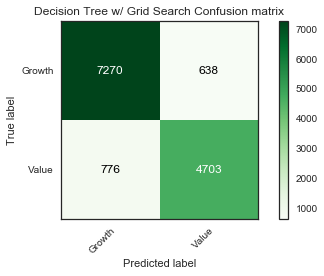

In [39]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Decision Tree w/ Grid Search Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

# Testing

In [45]:
sec_sym_com = pd.read_csv('sec_sym_com.csv')

In [184]:
test_pred_proba = dt_gs_results.predict_proba(no_symtest)
test = X_test.reset_index()
test = test.set_index(['Quarter end', 'symbol'])
predictions = pd.DataFrame(test_pred_proba,index=test.index ,columns = ['Growth', 'Value'])
predictions = predictions.reset_index()
predictions = predictions.set_index('Quarter end')

In [188]:
predictions[predictions['symbol'] == 'JWN'].max()

symbol         JWN
Growth           1
Value     0.888889
dtype: object

## Misclassified Data

In [187]:
y_pred_proba = ctree.predict(college_nba[X.columns])

In [192]:
misclassified_id = [id for id in list(college_nba[college_nba['drafted'] != y_pred_proba].index) ]

In [233]:
misclassifieds = pd.merge(college_names, predictions, left_index=True, right_index=True, how='inner')

In [275]:
misclass_id = pd.DataFrame(misclassified_id)

In [276]:
misclass_id = misclass_id.rename(columns= {0: 'id'})

In [278]:
misclass_id = misclass_id.set_index('id')

In [281]:
ms = pd.merge(misclassified,misclass_id, left_index= True, right_index= True, how = 'inner')

In [283]:
ms_data = pd.merge(ms,X, left_index=True, right_index = True, how= 'inner')

In [314]:
test = ms_data[ms_data['drafted'] < .9]

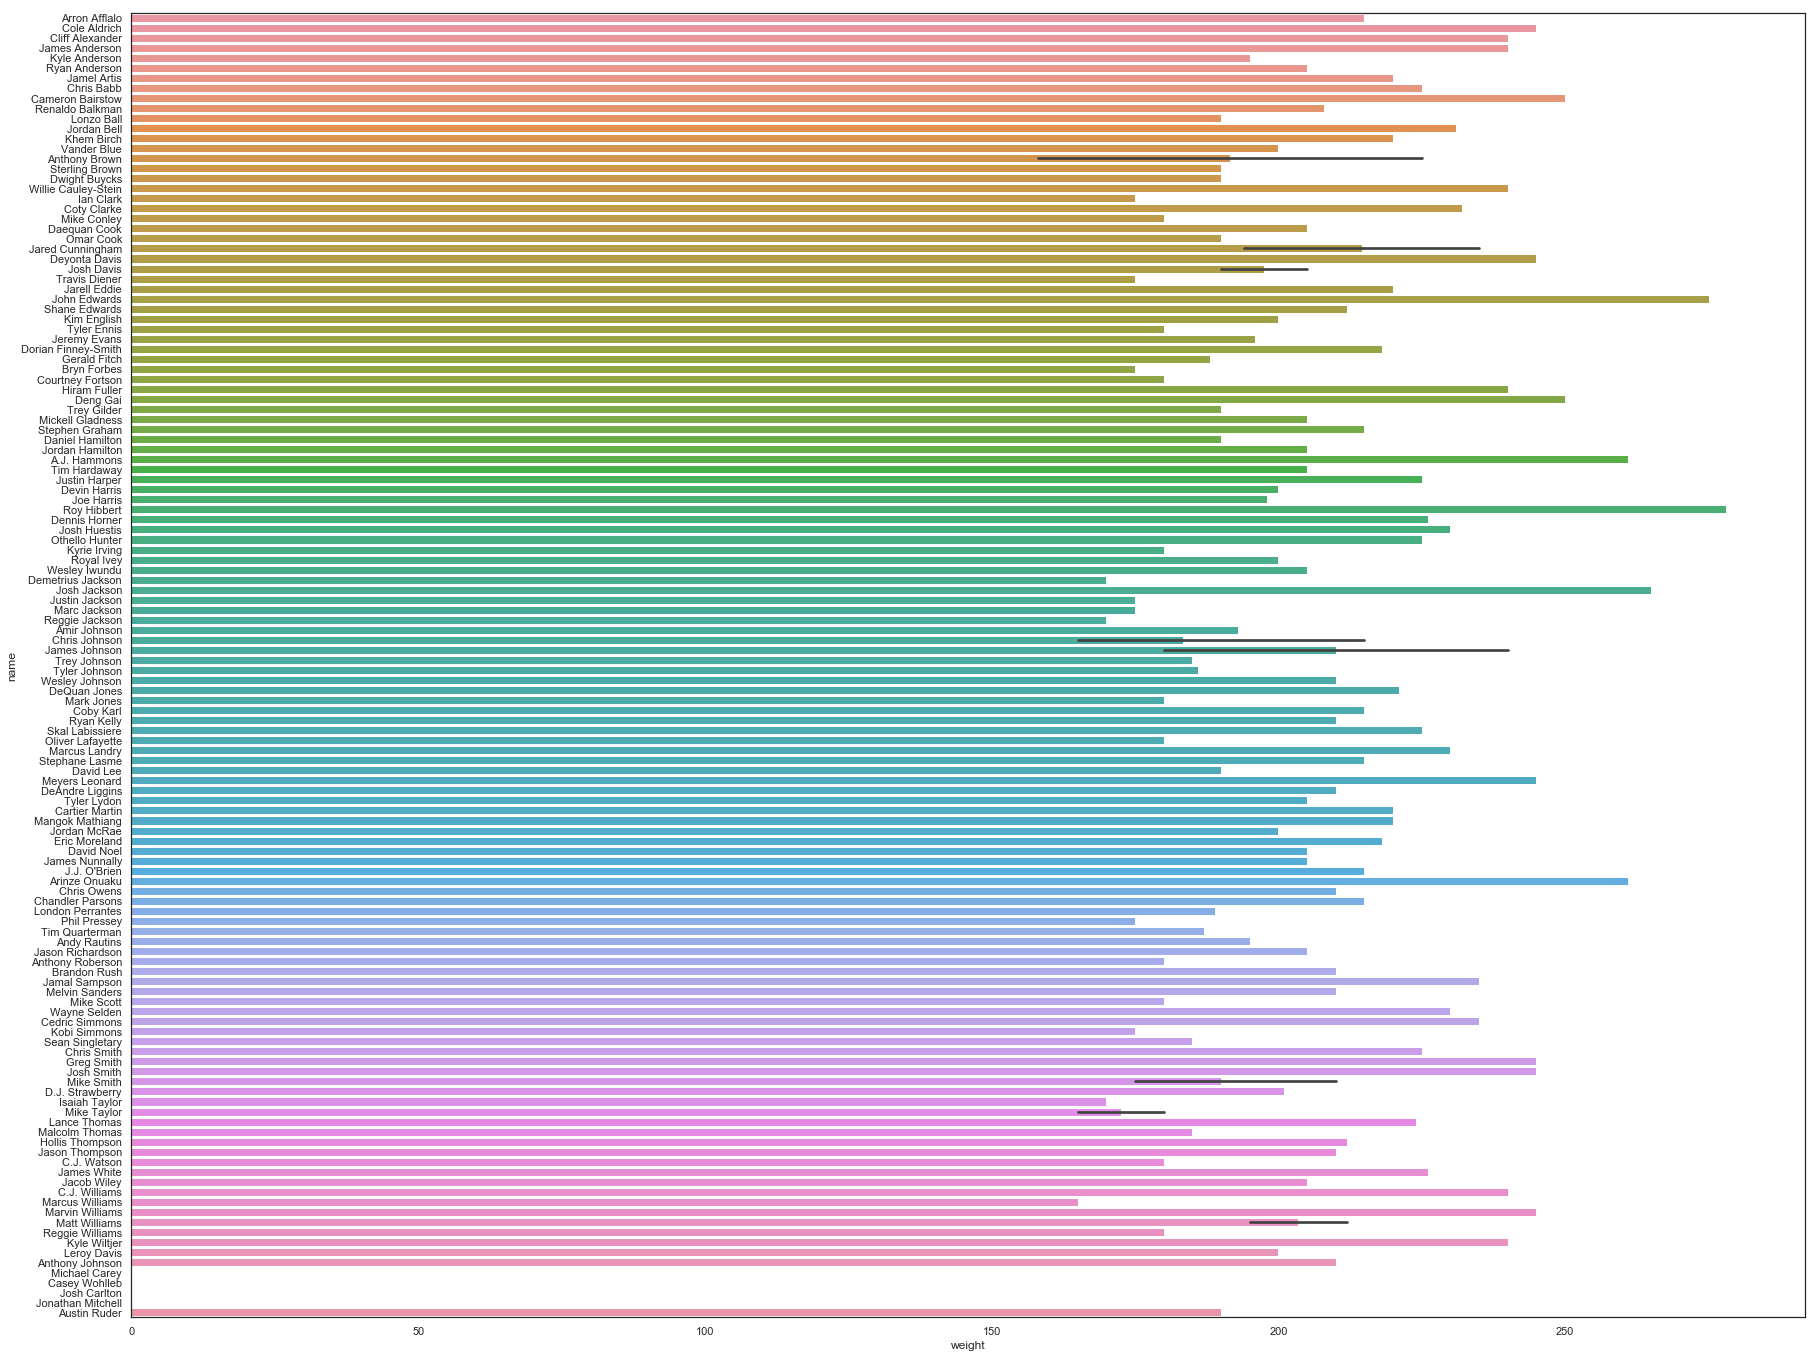

In [315]:
plt.figure(figsize=(30, 24))
sns.barplot(test['weight'], ms_data['name'],label="Count")
plt.show()

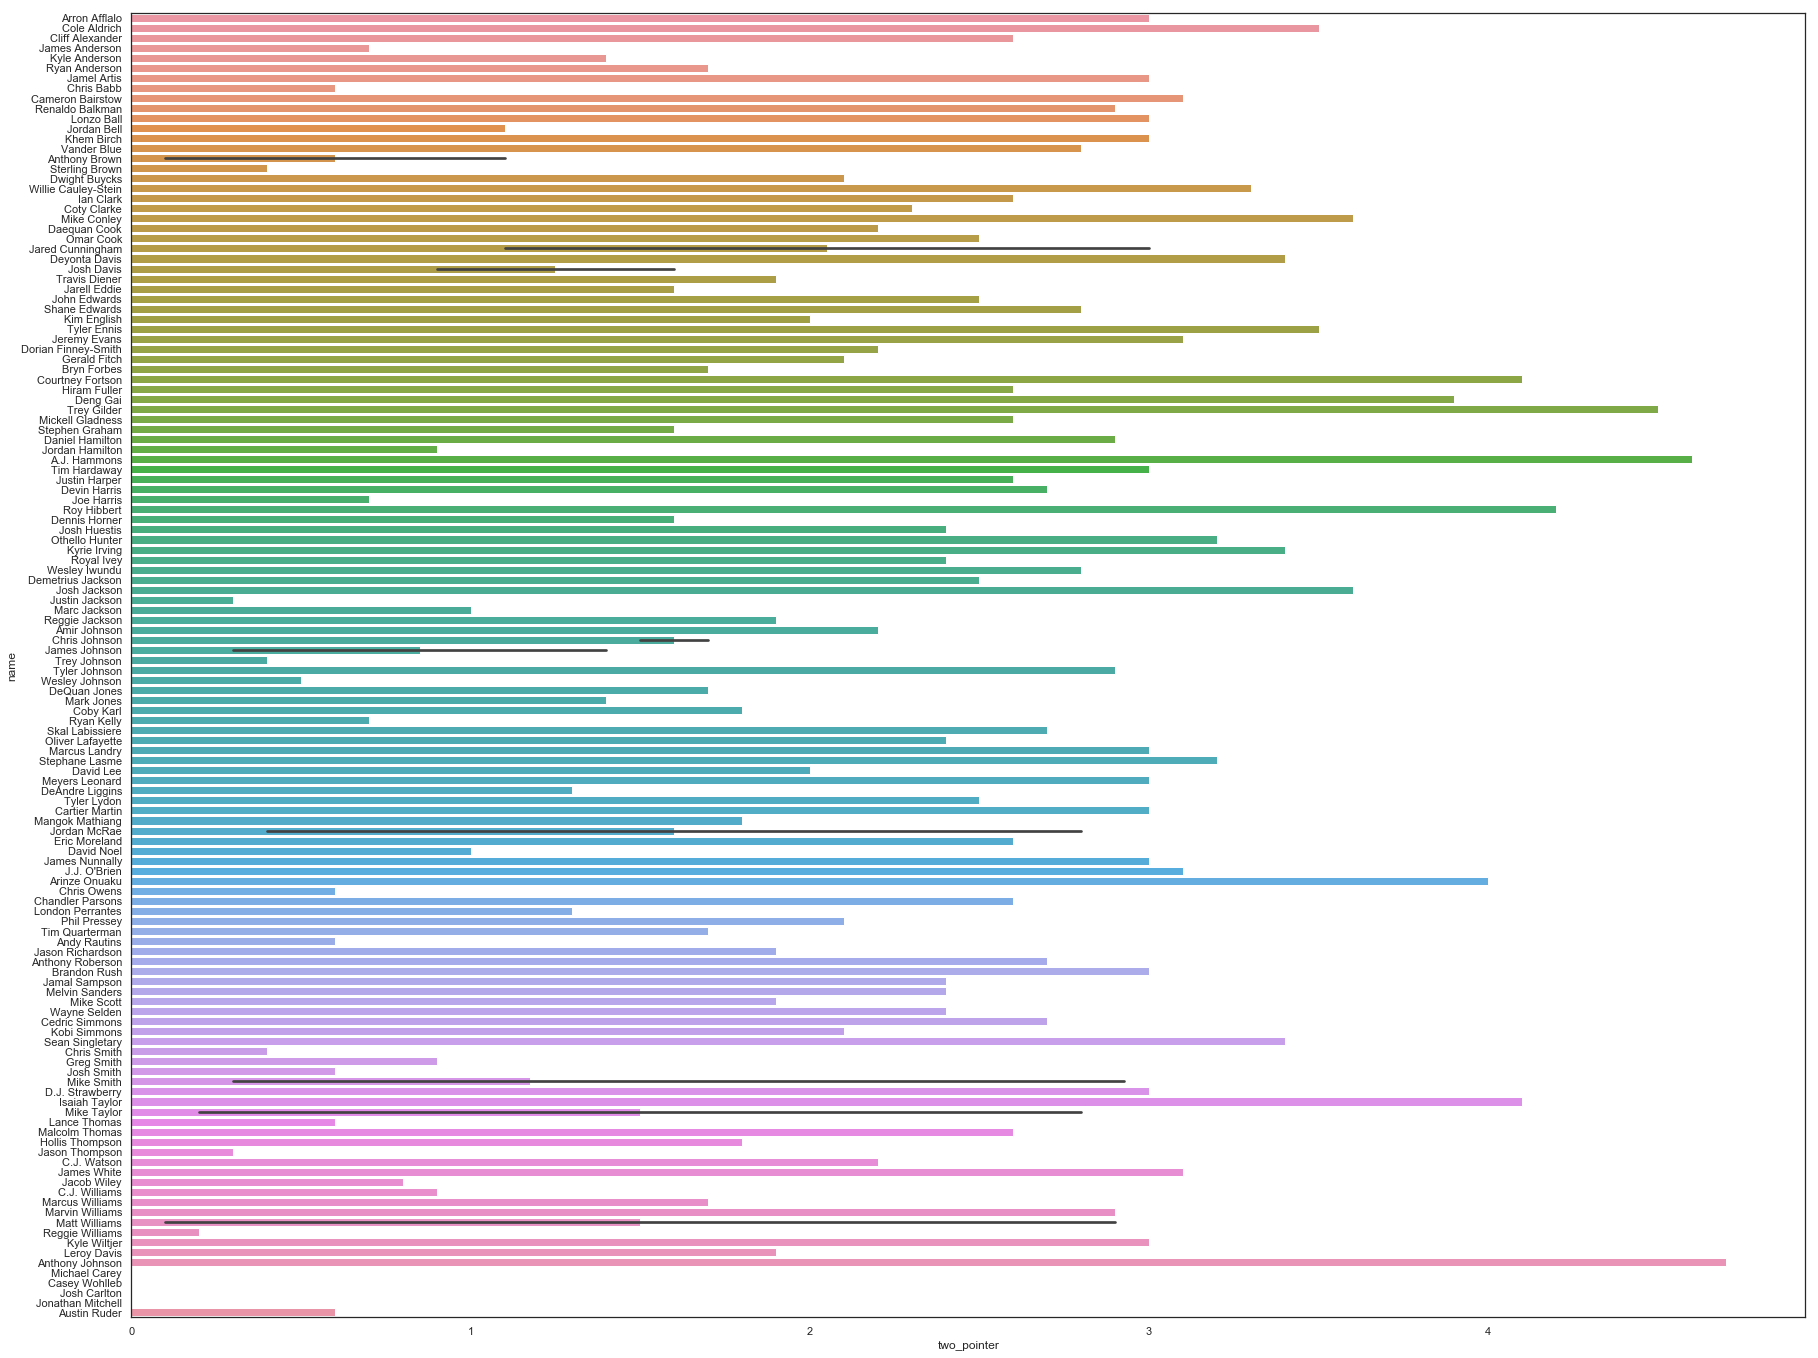

In [317]:
plt.figure(figsize=(30, 24))
sns.barplot(test['two_pointer'], ms_data['name'],label="Count")
plt.show()